# Predicting NBA Final Four (Semi-Final) Teams using ML Models
##### by Louise Lalescu and Julia Van Heeringen

##Introduction

> The NBA playoffs is an event that many sports fans look forward to watching every single year. In fact, some fans are so invested that they create their own brackets with the teams that they think are going to win each game. However, most people with no sort of statistical or machine learning background base their brackets off of previous performance and intuition. We find this process very interesting and wanted to create a model that could accurately predict the final four since these teams are considered the top teams in the country and have a great chance of winning the tournament. Developing a model could be very beneficial for team coaches, as it would help them understand what metrics they need to improve upon so that they can adjust their training strategy accordingly. This could change the future of sports and coaching that would aid teams in achieving success.


> Currently, there are some personal projects of individuals who have also attempted to predict NBA performance available online as well as some articles on sports websites that contain the sports experts’ picks for their brackets. A great example of this is Sports Illustrated. They post articles with the opinions of various experts and how they think certain teams will perform. However, these articles lack hard statistical quantities and focus more on team circumstances, “I don’t know if Philly has the shared playoff experience yet, and I think Boston takes a step back with a new coach.” (SI Staff). This sort of analysis of individual players and coaches on a team seems to be the most common sort of analysis out there. It is evident that there is not much statistical knowledge out there yet, but we could be heading in that direction with the power of machine learning.


> Moreover, the knowledge gap we are going to be addressing is the lack of accurate predictions of NBA brackets. We can narrow this gap by developing models that use previous game statistics and overall team performance in a season. This will provide us with new and more detailed insights that will hopefully aid us in creating an accurate model that can predict team performance.


> The research question we seek to answer is: can we predict which teams make it to the NBA Final Four (semi-finals)? If so, which feature is most important in determining the final four teams? We hypothesize that we can predict the final four teams to a certain extent. It is likely that the accuracy of our model won’t be incredibly high because winning a game sometimes depends on luck and which players are on a team (neither of which will be accounted for in our model). Even if our model accuracy is not incredibly high, the model will still serve as a good indicator of which teams will make it far in the NBA tournament.

##Methods and Materials:


> The data used in this project was collected from a website called NBAstuffer. This website provides a bunch of information on NBA analytics and unique statistics and has many tables with data available to download as excel files. We collected data from four different seasons: 2018-2019, 2019-2020, 2020-2021, and 2021-2022. Each of the rows in the excel files represents a specific player, along with their team name, age, and all of their performance statistics over the regular season. The excel files for all of these seasons can be downloaded by clicking on “NBA Stats”, then “Player Stats” (from the drop-down menu), then clicking on the desired season, clicking on “Regular Season”, and finally on the “Excel” button. We saved all of these downloads with the default file names and then read these into our Python program, removed the first row, renamed our columns with shorter names, added in a column with the appropriate season, and created a binary column which represents whether or not the team made it to the final four that season. Finally, we concatenated these four data frames into one that we could perform our analysis on.


> Moving onto the data cleaning, we checked for NaN values in our data and found that we had a couple in different columns. However, most of the NaNs were from players who didn’t play much, so we decided to impute them with zeroes since this is an appropriate reflection of their performance. We then proceeded to visually explore the distribution of minutes played and ages of all of our players using histograms. Subsequently, we plotted a correlation plot of our features to determine which of them we could possibly remove when fitting our model since we had 27 of them. We were able to identify a few just by looking at the heatmap, but we decided to return to this chart after running our models.

> Although we anticipate that the separation of players who played more than 10 minutes from all the players will cause any issues in our analysis, we decided to split up our data into all players and players who played more than 10 minutes, which we called "best players". This way, we can determine whether or not this distinction impacts the outcome of our models and whether or not we need to remove players who didn't play for the models to be more accurate. After this division of the data, all subsequent steps were performed on both data sets.

> Since our goal is to predict which teams will advance to the final four, we grouped our data by team and season, which resulted in a data frame with rows for each season every team played, and aggregate statistics from the group by. We later returned to the group by aggregate functions to reduce collinearity and the number of features. However, we did initially explore this data with some histograms to determine whether or not the distribution of average ages and turn over rate differed for all players and best players.


> To continue, the data was split into training data (70%) and testing data (30%). Of this testing data, 50% was used to create a development test so that we could test the accuracy of our data during the model tuning process while avoiding data leakage. At this point, we started fitting some models using our respective training data sets for our two player groups and selected a decision tree, a random forest with a maximum number of estimators of 15 and a max depth of 3, and a logistic regression with a maximum number of iterations of 1000, scaled using a standard scaler. To tune these models, we changed the maximum depth of the trees/forests, created another correlation plot of the features and started removing the more correlated features (which were created in the aggregate functions of our group by) until all further changes resulted in a decrease in accuracy. We also changed some of our average metrics to maximums/minimums in our data aggregation. Lastly, we also considered feature engineering, but we already had a large amount of features that were somewhat correlated, and decided against this idea because we believed it would not be beneficial.

> All of the code (with their explanations) up until the splitting of the data is included in this section. The code for fitting the models can be found in the results section.

Import Statements:

In [1]:
import matplotlib.pyplot as plt, numpy as np
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import tree

Reading in the data and concatenating the data for all of the seasons together:

In [2]:
master_df = pd.DataFrame()
fnames = ['NBA Stats 202122 All Player Statistics in one Page.xlsx', '2020-2021 NBA Stats  Player Box Score  Advanced Metrics.xlsx', '2019-2020 NBA Player Stats.xlsx', '2018-2019 NBA Player Stats.xlsx']
seasons = ['2021-2022', '2020-2021', '2019-2020', '2018-2019']
final_teams = [['Mia', 'Bos', 'Dal', 'Gol'], ['Lac', 'Pho', 'Atl', 'Mil'], ['Lal', 'Den', 'Mia', 'Bos'], ['Gol', 'Por', 'Tor', 'Mil']]
i=0
for fname in fnames:
  data = pd.read_excel(fname, index_col=0, skiprows=1)
  data.columns = ['Player_name', 'team', 'pos', 'age', 'gp', 'mpg', 'min%', 'usg%', 'tor%', 'fta', 'ft%', '2pa', '2p%', '3pa', '3p%', 'efg%', 'ts%', 'ppg', 'rpg', 'trb%', 'apg', 'ast%', 'spg', 'bpg', 'topg', 'vi', 'ortg', 'drtg']
  data['year'] = seasons[i]
  data['Final_four'] = data['team'].isin(final_teams[i]).astype(int)
  data = data.reset_index(drop=True)
  master_df = master_df.append(data)
  i+=1
print(master_df.shape)
master_df.head()

<ipython-input-2-87f9e5baa6e6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(data)
<ipython-input-2-87f9e5baa6e6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(data)
<ipython-input-2-87f9e5baa6e6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(data)


(2555, 30)


<ipython-input-2-87f9e5baa6e6>:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  master_df = master_df.append(data)


,Player_name,team,pos,age,gp,mpg,min%,usg%,tor%,fta,...,apg,ast%,spg,bpg,topg,vi,ortg,drtg,year,Final_four
0,Precious Achiuwa,Tor,F,22.56,73,23.6,49.2,18.5,11.3,131,...,1.1,6.9,0.51,0.56,1.15,6.8,105.4,104.0,2021-2022,0
1,Steven Adams,Mem,C,28.73,76,26.3,54.8,12.0,19.6,199,...,3.4,16.1,0.87,0.79,1.51,9.4,124.7,103.9,2021-2022,0
2,Bam Adebayo,Mia,C-F,24.73,56,32.6,67.9,25.0,14.4,340,...,3.4,17.5,1.43,0.79,2.64,10.7,117.2,98.2,2021-2022,1
3,Santi Aldama,Mem,F-C,21.25,32,11.2,23.4,18.5,9.9,32,...,0.7,7.7,0.19,0.31,0.50,7.1,101.1,103.9,2021-2022,0
4,LaMarcus Aldridge,Bro,C-F,36.73,47,22.3,46.5,22.4,8.0,102,...,0.9,6.3,0.30,1.00,0.94,7.2,119.6,108.8,2021-2022,0


Checking for NaN Values:

In [3]:
master_df.isna().sum()

Player_name      0
team             0
pos              0
age              0
gp               0
mpg              0
min%             0
usg%             0
tor%            22
fta              0
ft%              0
2pa              0
2p%              0
3pa              0
3p%              0
efg%            25
ts%             23
ppg              0
rpg              0
trb%             0
apg              0
ast%             0
spg              0
bpg              0
topg             0
vi               0
ortg           132
drtg           129
year             0
Final_four       0
dtype: int64

Imputing NaN values with zeroes and filtering the data so that best players includes only players who played more than 10 minutes.

In [4]:
master_df=master_df.fillna(0)
master_df.isna().sum()

Player_name    0
team           0
pos            0
age            0
gp             0
mpg            0
min%           0
usg%           0
tor%           0
fta            0
ft%            0
2pa            0
2p%            0
3pa            0
3p%            0
efg%           0
ts%            0
ppg            0
rpg            0
trb%           0
apg            0
ast%           0
spg            0
bpg            0
topg           0
vi             0
ortg           0
drtg           0
year           0
Final_four     0
dtype: int64

As part of our analysis, we wanted to investigate the distribution of minutes played by each player. After plotting this on a histogram, we found that minutes played is approximately normally distributed, which is a good sign since that means that our sample is a good representation of NBA players and means that the data contains all player data, and not just the players who played the most. We were also interested in the distribution of player ages, so we created another histogram with player ages to find that the majority of the players are in their mid-twenties. This was expected since athletes tend to retire at younger ages because of the physical impact that their sport has on their bodies. 



From this plot, we see that the distribution of minutes played appears to be relatively normally distributed.

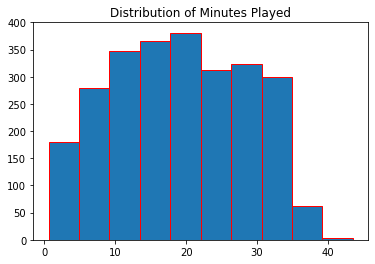

In [5]:
plt.hist(master_df['mpg'], bins=10, edgecolor='red')
plt.title("Distribution of Minutes Played")
plt.show()

From this plot, we determine that most of our players are between 20 and 30 years old.

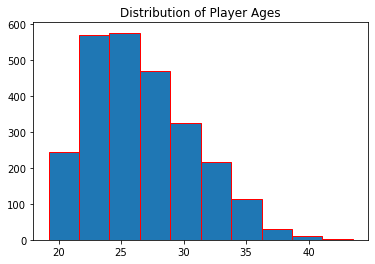

In [6]:
plt.hist(master_df['age'], edgecolor='red')
plt.title("Distribution of Player Ages")
plt.show() 

Below is the correlation plot of our original predictors. It is clear that we have some collinearity concerns with some lighter orange blocks (indicating higher correlation) for points per game (ppg) and minutes per game (mpg). We will go through a process of removing these features when tuning our model.

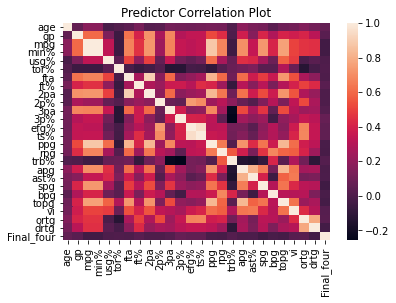

In [7]:
correlation_features = master_df.drop(['Player_name', 'team'], axis=1)
corr = correlation_features.corr()
heatmap = sns.heatmap(corr, xticklabels=True, yticklabels=True)
plt.title("Predictor Correlation Plot")
plt.show()

Splitting up our data into all players and best players:

In [8]:
all_players = master_df
best_players = all_players[all_players['min%']>10]
print(all_players.shape, best_players.shape)

(2555, 30) (2376, 30)


Performing a groupby by team and season for the data with all the players and the data with only the players that played more than 10 minutes ("best players")

In [9]:
all_players_df = all_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('2p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'), avg_efg_perc=('efg%', 'mean'), avg_ppg=('ppg', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), final_four=('Final_four', 'max'))
best_players_df = best_players.groupby(['team','year']).agg(avg_age=('age', 'mean'), avg_turnover_rate=('tor%', 'mean'), avg_fta=('fta', 'mean'), avg_ft_perc=('ft%', 'mean'), avg_2pa=('2pa', 'mean'), avg_2p_perc=('2p%', 'mean'), avg_3pa=('3pa', 'mean'), avg_3p_perc=('3p%', 'mean'),avg_efg_perc=('efg%', 'mean'), avg_ppg=('ppg', 'mean'), max_rpg=('rpg','max'), avg_trb_perc=('trb%', 'mean'), max_apg=('apg', 'max'), max_spg=('spg', 'max'), avg_bpg=('bpg', 'mean'), min_topg=('topg', 'min'), final_four=('Final_four', 'max'))
all_players_df = all_players_df.reset_index()
best_players_df = best_players_df.reset_index()
all_players_df.head()

,team,year,avg_age,avg_turnover_rate,avg_fta,avg_ft_perc,avg_2pa,avg_2p_perc,avg_3pa,avg_3p_perc,avg_efg_perc,avg_ppg,max_rpg,avg_trb_perc,max_apg,max_spg,avg_bpg,min_topg,final_four
0,Atl,2018-2019,25.753182,11.631818,87.181818,0.619455,204.181818,0.456273,137.954545,0.331091,0.542818,7.450000,9.8,10.877273,8.1,1.33,0.341818,0.00,0
1,Atl,2019-2020,26.711429,13.004762,74.571429,0.689762,173.904762,0.461238,115.047619,0.259667,0.460095,8.185714,10.1,9.623810,9.3,1.31,0.440476,0.00,0
2,Atl,2020-2021,26.416111,12.933333,96.944444,0.783833,215.500000,0.472056,133.444444,0.282889,0.496889,9.411111,14.3,9.983333,9.4,1.27,0.388333,0.27,1
3,Atl,2021-2022,26.000417,9.962500,76.208333,0.688375,184.125000,0.484417,117.583333,0.298625,0.501542,7.991667,11.9,9.816667,9.7,1.33,0.290000,0.00,0
4,Bos,2018-2019,26.311765,9.835294,94.000000,0.695588,270.176471,0.547176,166.411765,0.313588,0.546353,9.176471,6.7,11.894118,6.9,1.79,0.415294,0.00,0


Bar graph of the average age of each team from the all players data. It seems that there is not much of a difference in average age of players across all teams.

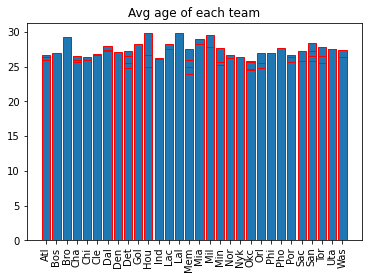

In [10]:
plt.bar(all_players_df['team'], all_players_df['avg_age'], edgecolor='red')
plt.title("Avg age of each team")
plt.xticks(rotation = 90)
plt.show() 

Bar graph of the average age of each team from the best players data. It seems that there is not much of a difference in average age of players across all teams and also not much of difference between all players and best players as the graphs are nearly identical.

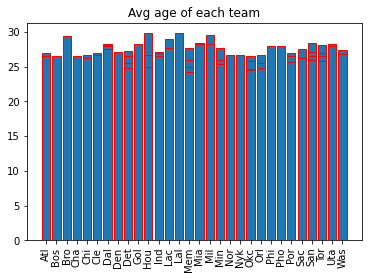

In [11]:
plt.bar(best_players_df['team'], best_players_df['avg_age'], edgecolor='red')
plt.title("Avg age of each team")
plt.xticks(rotation = 90)
plt.show() 

Bar graph of the average turn over rate of each team from the all players data. It is evident that teams such as the Minnesota Timberwolves (Min) and New Orleans Pelicans (Nor) have much higher turn over rates than other teams.

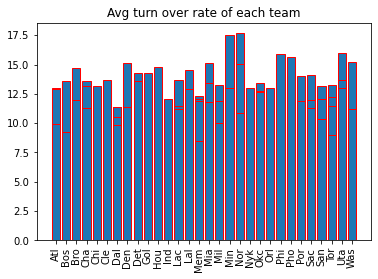

In [12]:
plt.bar(all_players_df['team'].sort_values(), all_players_df['avg_turnover_rate'], edgecolor='red')
plt.title("Avg turn over rate of each team")
plt.xticks(rotation = 90)
plt.show() 

Bar graph of the average turn over rate of each team from the best players data. While some of the rates have changed, there is not a significant difference between this plot and the one prior for all the players.

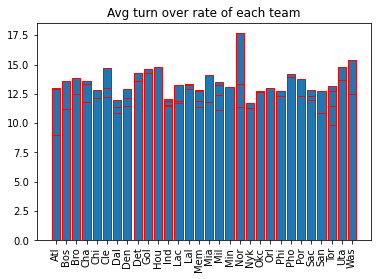

In [13]:
plt.bar(best_players_df['team'], best_players_df['avg_turnover_rate'], edgecolor='red')
plt.title("Avg turn over rate of each team")
plt.xticks(rotation = 90)
plt.show() 

Splitting our data into 70% training and 30% testing. Of the testing data, 50% will be used as a development set to test the accuracy of our model while avoiding data leakage. This means, of our total data, 70% is used for training, 15% is used for testing, and 15% is used for development.

In [14]:
random_seed = 9
target = all_players_df.pop('final_four')
x = all_players_df.drop(['team', 'year'], axis=1)
y = target
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, shuffle=True, random_state = random_seed) 
x_dev, x_test, y_dev, y_test = train_test_split(x_test,y_test, test_size=0.5, shuffle=True, random_state = random_seed) #creating development set

In [15]:
random_seed = 9
target_best = best_players_df.pop('final_four')
x_best = best_players_df.drop(['team', 'year'], axis=1)
y_best = target_best
x_train_best, x_test_best, y_train_best, y_test_best = train_test_split(x_best,y_best, test_size=0.3, shuffle=True, random_state = random_seed) 
x_dev_best, x_test_best, y_dev_best, y_test_best = train_test_split(x_test_best,y_test_best, test_size=0.5, shuffle=True, random_state = random_seed) #creating development set

##Results:



> In summary, we fit 3 different models for each of our two data sets. The first was a decision tree, which resulted in an accuracy of 77.778% on the development set for all players and 44.444% accuracy for best players. Next, we fit a random forest with 15 estimators and a maximum depth of 3 to avoid overfitting, which resulted in an accuracy of 77.778% for both all players and best players. Finally, we fit a logistic regression model, scaled using a standard scaler, resulting in 55.555% accuracy for all players and 61.111% accuracy for best players. 

> The heatmap shown after the code for the fitting of the model shows the heatmap we consistently kept re-creating each time after we tuned our model to see which features we could eliminate or adjust to reduce collinearity and hopefully improve model accuracy. It is clear that the features we are left with in our final model have very low correlation, indicated by the dark purple colors on the graph that represent low correlation. If you compare this heatmap to the one created for the original data frame, it is evident that there is a major decrease in correlations, as well as the number of features.



> Following the tuning of the model, we were ready to fit the models on the testing data, rather than the development set. We decided to only run the decision tree and the random forest models since they had accuracies that were significantly higher than the logistic regression. We also concluded that the difference between all players and best players was not significant enough to run the models twice, so proceeded to run the models on the test set with all the players. Both the decision tree and random forest resulted in an accuracy of 88.888%.

Fitting a decision tree model for all players

In [16]:
clf = DecisionTreeClassifier(random_state=1)
fitted = clf.fit(x_train, y_train)
print(fitted.score(x_dev, y_dev.astype(int)))

0.7777777777777778


Fitting a decision tree model for our "best" players

In [17]:
clf_best = DecisionTreeClassifier(random_state=1)
fitted_best = clf_best.fit(x_train_best, y_train_best)
print(fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.4444444444444444


Fitting a random forest model for all players

In [18]:
rf_cls = RandomForestClassifier(n_estimators = 15, max_depth = 3, random_state=1)
rf_fitted = rf_cls.fit(x_train, y_train)
print(rf_fitted.score(x_dev, y_dev.astype(int)))

0.7777777777777778


Fitting a random forest model for our "best" players

In [19]:
rf_cls_best = RandomForestClassifier(n_estimators = 15, max_depth = 3, random_state=1)
rf_fitted_best = rf_cls_best.fit(x_train_best, y_train_best)
print(rf_fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.7777777777777778


Fitting a logistic regression model for all players using a standard scaler

In [20]:
chosen_scaler = StandardScaler
logistic_regression = make_pipeline(chosen_scaler(), LogisticRegression(random_state=1, max_iter=1000))
lr_fitted = logistic_regression.fit(x_train, y_train)
print(lr_fitted.score(x_dev, y_dev.astype(int)))

0.5555555555555556


Fitting a logistic regression model for our "best" players using a standard scaler

In [21]:
chosen_scaler = StandardScaler
logistic_regression_best = make_pipeline(chosen_scaler(), LogisticRegression(random_state=1, max_iter=1000))
lr_fitted_best = logistic_regression_best.fit(x_train_best, y_train_best)
print(lr_fitted_best.score(x_dev_best, y_dev_best.astype(int)))

0.6111111111111112


Below is the plot of all of the final features included in the models. From this plot, we can see that we do not have many correlation issues to concerned about since most of the quadrants are of darkers colors, indicating less correlation. There are a few that are a lighter orange, avg_2p_perc (average 2 point percentage) and avg_fta (average free throw attempts), but this makes sense because more free throw attempts leads to more 2 pointers made.

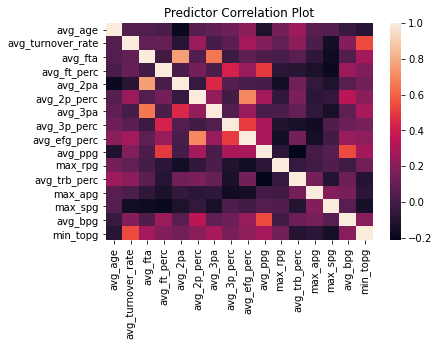

In [22]:
corr = x_train.corr()
heatmap = sns.heatmap(corr, xticklabels=True, yticklabels=True)
plt.title("Predictor Correlation Plot")
plt.show()

Testing the decision tree model for all players on our actual testing data:

In [23]:
clf_test = DecisionTreeClassifier(random_state=1)
fitted_test = clf_test.fit(x_train, y_train)
print(fitted_test.score(x_test, y_test.astype(int)))

0.8888888888888888


Testing the random forest model for all players on our actual testing data:

In [24]:
rf_cls_test = RandomForestClassifier(n_estimators = 15, max_depth = 3, random_state=1)
rf_fitted_test = rf_cls_test.fit(x_train, y_train)
print(rf_fitted_test.score(x_test, y_test.astype(int)))

0.8888888888888888


##Discussion:


> To analyze our results, we investigated the feature importances of both the decision tree and random forest since they performed equally well on the development data with all players. To accomplish this, we plotted feature importance for the random forest model and generated a plot of the actual decision tree. From the bar graph of the random forest feature importances, we can see that average 3 point percentage had the highest feature importance at 0.2, followed by average blocks per game and maximum assists per game. Looking at the decision tree visualization, we determine that average 3 point percentage is the most important feature in this model as well since decision trees work based on splitting data by highest entropy (or information gain). Therefore, features at the top of the tree are more important than those at the bottom. Although the most important feature of the tree is the same as in the random forest model, the second most important feature is average points per game, followed by average free throw percentage, neither of which are in the top 3 features of the random forest model. Finally, we can conclude that regardless of which of the two models is chosen, average 3 point percentage is the most influential feature in predicting whether or not a team will make it to the semi-finals.



Feature importance bar graph for random forest

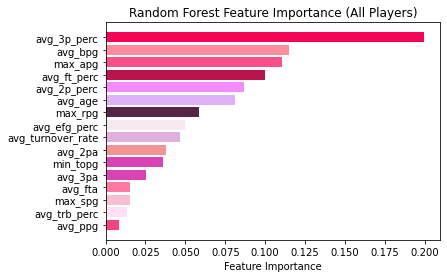

In [25]:
importances = rf_cls_test.feature_importances_
indices = np.argsort(importances)
colors=["#f54281", "#fce1f6", "#f5bfd0", "#fc79a3", "#d943b6", "#d943b6", "#f29495", "#e0afe0", "#f5e9ed","#572346", "#dfb0f5", "#f48cff", "#ba144c", "#fa5089", "#ff8c9d", "#f50555"]

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices], color=colors)
ax.set_yticks(range(len(importances)))
ax.set_yticklabels(np.array(x_test.columns)[indices])
plt.title("Random Forest Feature Importance (All Players)")
plt.xlabel("Feature Importance")
plt.show()

Visualization of decision tree

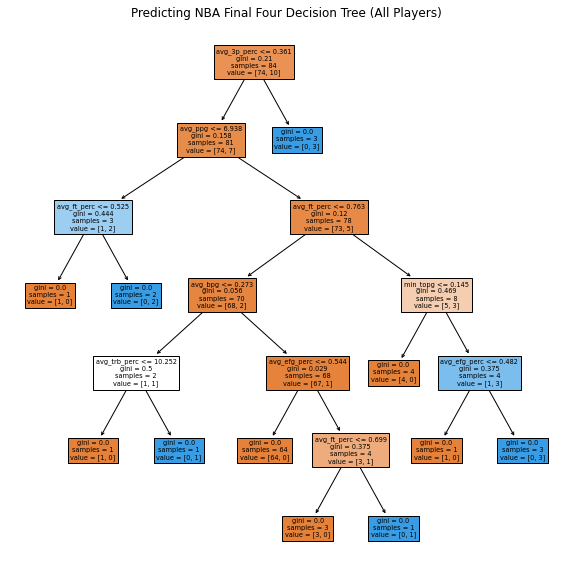

In [26]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf_test, feature_names = x_test.columns, filled=True)
plt.title("Predicting NBA Final Four Decision Tree (All Players)")
plt.show()

> In our research comparing our model to other existing models we found that average 3 point percentage was not a common feature used in models. Most models used true shooting percentage, but with our heat map we found that to be strongly correlated with 3 point average. The formula for true shooting percentage takes into account three pointers, but in our case wasn’t as good of a feature as 3 pointers. The reason other models may not include it is the emphasis on 3 pointers is more of a  recent phenomenon in basketball. Our model did include many more typical features like blocks, steals, and 2 pointers. In our tuning of the model not all of our features were average, but minimums and maximums as well (Houde, 2021). One thing we could also work on to improve is creating a new calculated field relating to true shooting percentage, but with a higher emphasis on 3 pointers.

> For people trying to create an entire bracket our model would prove more useful than traditional game by game models. The best models for game by game have 74.1% accuracy and the average at 62%-67% accuracy (Wiener, 2021). Though our model is hard to compare with game by game models, in the playoffs for predicting a bracket our model would likely outperform.


##Conclusion:

> In the world of sports analytics it is becoming more and more important, from drafting players, to scouting players, and even sports bettors looking to quickly make a buck. For bettors looking to create a bracket for the finals, our model may be very useful, for those trying to predict games, not so much. However, this model could be used as a general tool for coaches to adapt their programs and even determine what skills their team could improve on. With an accuracy of 88.88%, our model is off to a great start, but through some more layers, we believe our model could potentially outperform other existing models for individual games.



##References:

Houde, M. (2021, May). Predicting the outcome of NBA games. https://digitalcommons.bryant.edu/cgi/viewcontent.cgi?article=1000&context=honors_data_science. Retrieved December 5, 2022, from https://digitalcommons.bryant.edu/cgi/viewcontent.cgi?article=1000&context=honors_data_science
NBA Player Stats Index. (n.d.). NBAstuffer. https://www.nbastuffer.com/player-stats/
Staff, S. I. (2022, October 18). NBA Finals predictions: Expert picks for the 2022–23 season. Sports Illustrated. Retrieved November 15, 2022, from https://www.si.com/nba/2022/10/18/nba-finals-predictions-expert-picks-clippers-bucks-warriors-nuggets 
Weiner, J. (2022, July 15). Predicting the outcome of NBA games with Machine Learning. Medium. Retrieved December 2, 2022, from https://towardsdatascience.com/predicting-the-outcome-of-nba-games-with-machine-learning-a810bb768f20 
